# <font color='red'>Algoritimo RNA Usando Validação Cruzada</font>

###### Por: Marcus Rosa Godoi

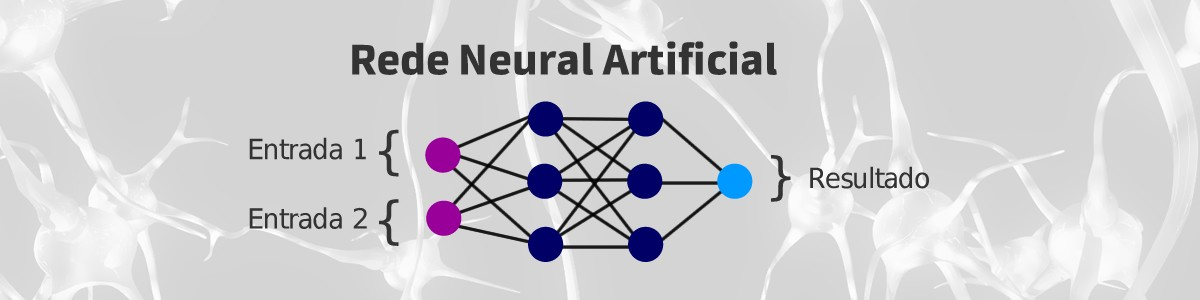

Fonte:<a href="https://medium.com/brasil-ai/entendendo-o-funcionamento-de-uma-rede-neural-artificial-4463fcf44dd0">medium.com/</a>

# 1 - Keras - Sequential Model
<a href="https://keras.io/guides/sequential_model/">keras/</a>

In [ ]:
#Import
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report          
from yellowbrick.classifier import ConfusionMatrix   

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

## 1.1 - Criar Modelo Sequencial

Verificar Parametros no Notebook "01 Algoritimo de Rede Neural Arificial"

In [ ]:
def criarRede():
    
    modelo = Sequential()
    
    modelo.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))    
    modelo.add(Dropout(0.2))
    
    modelo.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
    modelo.add(Dropout(0.2))
    
    modelo.add(Dense(units = 1, activation = 'sigmoid'))
    
    otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    
    modelo.compile(optimizer = otimizador, 
                          loss = 'binary_crossentropy',
                          metrics = ['binary_accuracy'])
    
    return modelo

In [ ]:
#Classificação
modelo = KerasClassifier(build_fn = criarRede)

In [ ]:
#parametros de teste:
parametros = {'batch_size': [10, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd'],
              'loos': ['binary_crossentropy', 'hinge'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh'],
              'neurons': [16, 8]}

In [ ]:
grid_search = GridSearchCV(estimator = modelo,
                           param_grid = parametros,
                           scoring = 'accuracy',
                           cv = 10)

## 1.2 - Treino

In [ ]:
grid_search = grid_search.fit(previsores, classe)

## 1.3 - Melhores Parâmetros

In [ ]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_
print(melhores_parametros)
print(melhor_precisao)

# Fim

### Obrigado - Marcus Rosa Godoi 